In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')

# Data Cleaning 



In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.shape

(5572, 5)

In [6]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df = df.rename(columns={'v1':'target','v2':'text'})

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.duplicated().isnull().sum()

0

# Feature Engineering 

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()

In [13]:
df['target']= encoder.fit_transform(df.target)

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.duplicated().isnull().sum()

0

In [16]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

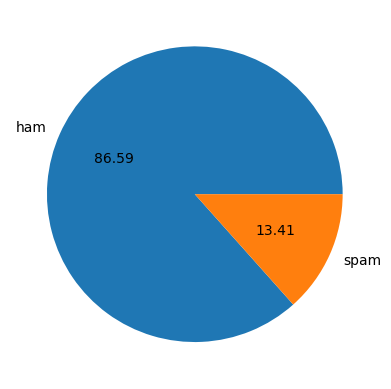

In [17]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

Observation : We can see the almost 87% data are belongs to ham and only 13% on data are in spam side so we can clearly saw that we have such an imbalanced dataset on target feature.

In [18]:
!pip install nltk

# Adding new features based on text feature with respect to it's characters, words and sentance length

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
 df['num_characters'] = df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['num_words']= df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
df['num_sentences']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

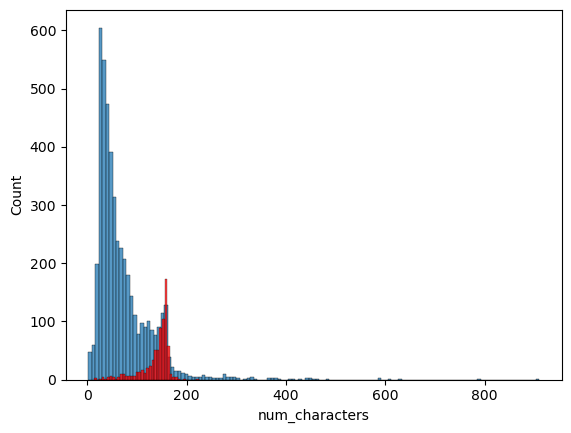

In [29]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

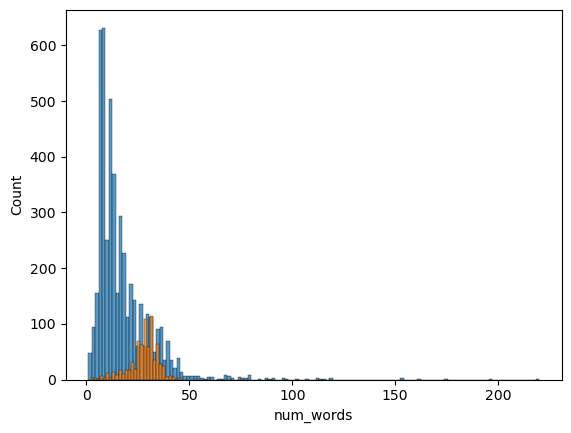

In [30]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

<Axes: xlabel='num_sentences', ylabel='Count'>

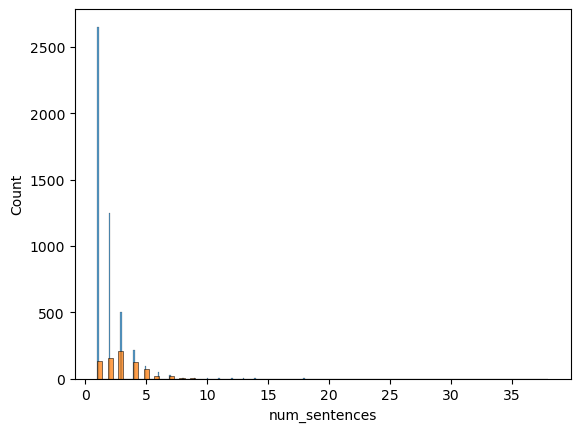

In [31]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'])

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


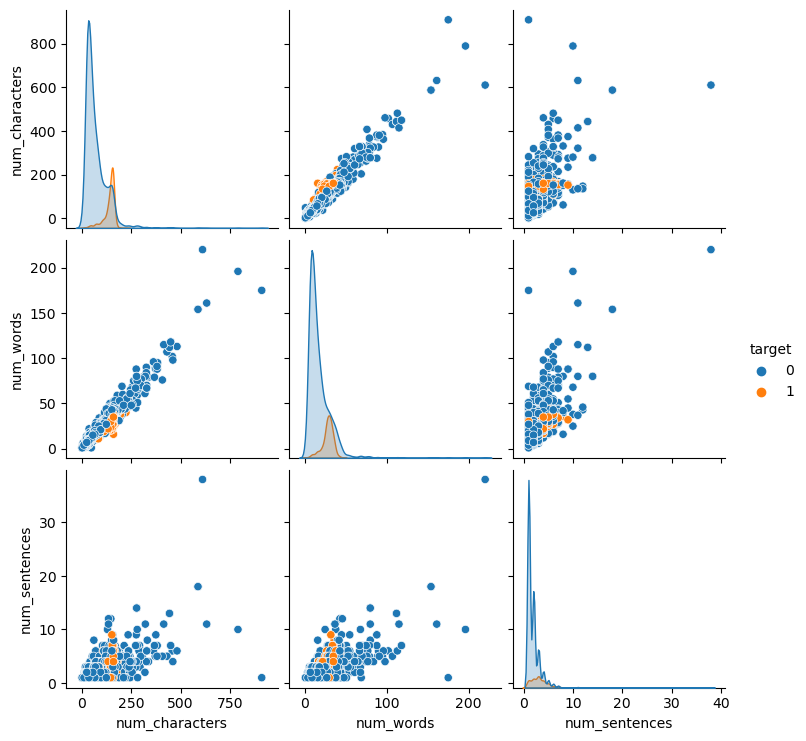

In [32]:
sns.pairplot(df,hue='target')

In [33]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [34]:
df2  = df.drop(columns={'text'},axis=1)

In [35]:
df2.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.387285,0.263221,0.265332
num_characters,0.387285,1.000000,0.966310,0.631881
num_words,0.263221,0.966310,1.000000,0.685165
num_sentences,0.265332,0.631881,0.685165,1.000000


<Axes: >

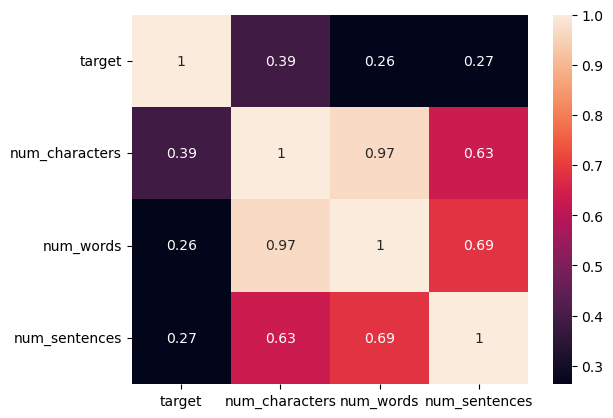

In [36]:
sns.heatmap(df2.corr(),annot=True)

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
!pip install nltk

In [39]:
import nltk

In [40]:
from nltk.corpus import stopwords

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
import string

In [43]:
from nltk.stem.porter import PorterStemmer

In [44]:
ps= PorterStemmer()

In [45]:
def update_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = [] 
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [46]:
df['updated_text'] = df['text'].apply(update_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,updated_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
df['updated_text'][5]

'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'

In [49]:
from wordcloud import WordCloud

In [50]:
df[df['target']==1]['updated_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: updated_text, Length: 747, dtype: object

In [51]:
combined_text_spam = " ".join(df[df['target']==1]['updated_text'])

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,updated_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
wc = WordCloud().generate(combined_text_spam)

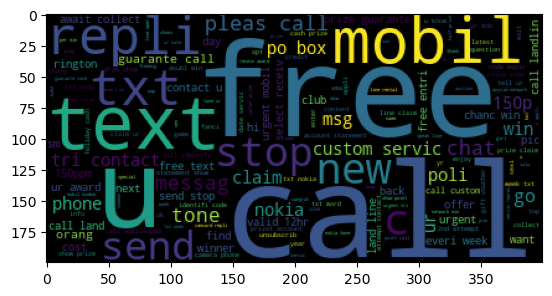

In [54]:
plt.imshow(wc)

In [55]:
combined_text_ham = " ".join(df[df['target']==0]['updated_text'])

In [56]:
wc1 = WordCloud().generate(combined_text_ham)

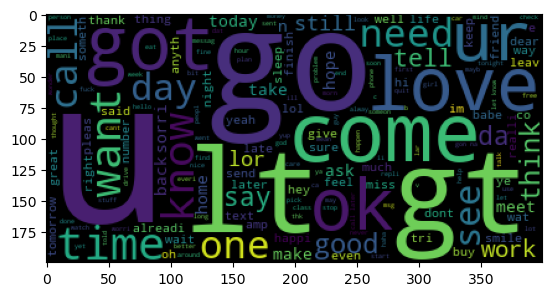

In [57]:
plt.imshow(wc1)

In [58]:
ham_corpus = []
for msg in df[df['target']==0]['updated_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [59]:
from collections import Counter

In [60]:
top_30_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))

In [61]:
top_30_ham

,0,1
0,u,979
1,go,417
2,get,357
3,gt,318
4,lt,316
5,2,300
6,come,295
7,call,291
8,know,248
9,ok,245


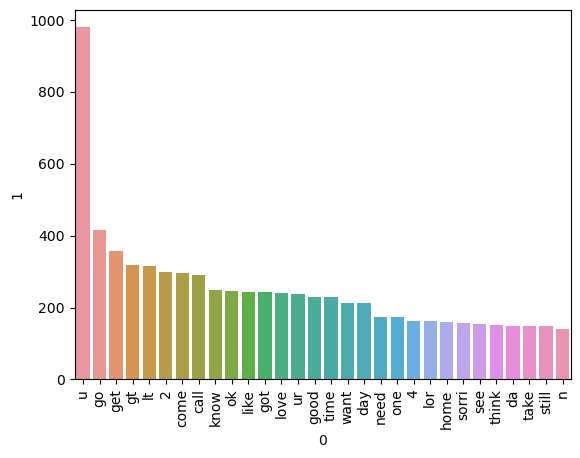

In [62]:
sns.barplot(x=top_30_ham[0],y=top_30_ham[1],data=top_30_ham)
plt.xticks(rotation='vertical')
plt.show()

Top 30 highest used keywords on ham 


In [63]:
spam_corpus = []
for msg in df[df['target']==1]['updated_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [64]:
top_30_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))

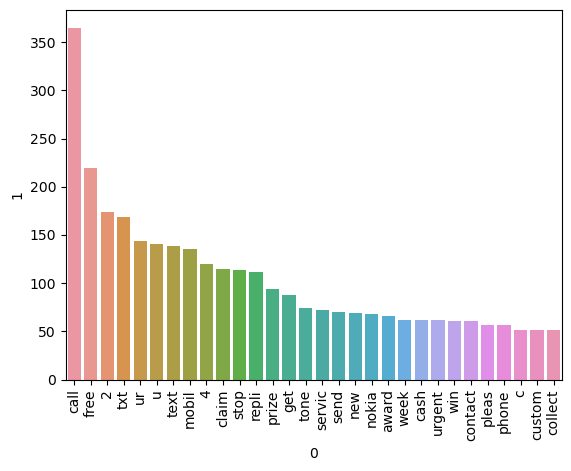

In [65]:
sns.barplot(x=top_30_spam[0],y=top_30_spam[1],data=top_30_spam)
plt.xticks(rotation='vertical')
plt.show()

Top 30 highest used keywords on Spam

# Model Building


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [67]:
tfidf = TfidfVectorizer(max_features=3000)

In [68]:
X = tfidf.fit_transform(df['updated_text']).toarray()


In [69]:
X.shape

(5572, 3000)

In [70]:
y = df['target'].values

In [71]:
df['target']


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

In [72]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [73]:
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [76]:
X_train.shape

(4457, 3000)

In [77]:
gb.fit(X_train,y_train)
mb.fit(X_train,y_train)
bb.fit(X_train,y_train)

BernoulliNB()

In [78]:
y_predict = (gb.predict(X_test))
y1_predict =(mb.predict(X_test))
y2_predict = (bb.predict(X_test))

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,classification_report

In [80]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.8672645739910314
[[841 116]
 [ 32 126]]
0.5206611570247934
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       957
           1       0.52      0.80      0.63       158

    accuracy                           0.87      1115
   macro avg       0.74      0.84      0.77      1115
weighted avg       0.90      0.87      0.88      1115



In [81]:
print(accuracy_score(y_test,y1_predict))
print(confusion_matrix(y_test,y1_predict))
print(precision_score(y_test,y1_predict))
print(classification_report(y_test,y1_predict))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       957
           1       0.99      0.76      0.86       158

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [82]:
print(accuracy_score(y_test,y2_predict))
print(confusion_matrix(y_test,y2_predict))
print(precision_score(y_test,y2_predict))
print(classification_report(y_test,y2_predict))

0.9748878923766816
[[955   2]
 [ 26 132]]
0.9850746268656716
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       957
           1       0.99      0.84      0.90       158

    accuracy                           0.97      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.98      0.97      0.97      1115



In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier 

In [84]:
lr = LogisticRegression()
svc = SVC(kernel='sigmoid')
kn = KNeighborsClassifier()
nb = MultinomialNB()
dt = DecisionTreeClassifier(max_depth=5)
rc = RandomForestClassifier(n_estimators=50,random_state=2)
adb = AdaBoostClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [85]:
cls = {
    
    "LR": lr,
    "SVS" : svc,
    "kN" : kn,
    "NB" : nb,
    "DT" : dt,
    "RFC" : rc,
    "Adaboost" : adb,
    "GBC" : gbc,
    "BC" : bc,
    "ETC" : etc,
    "xgb" : xgb
        
}

In [86]:
from sklearn.metrics import accuracy_score as sk_accuracy_score, precision_score as sk_precision_score

def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = sk_accuracy_score(y_test,y_pred)
    precision = sk_precision_score(y_test,y_pred)
    
    return accuracy,precision

In [87]:
train_classifier(kn,X_train,X_test,y_train,y_test)

(0.9040358744394619, 1.0)

In [88]:
accuracy_score = []
precision_score = []
names = []
for name,clf in cls.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,X_test,y_train,y_test)
#     print("Name", name)
#     print("Accuracy-" , current_accuracy)
#     print("Pricision-",current_precision)
    accuracy_score.append(current_accuracy)
    precision_score.append(current_precision)
    names.append(name)

In [89]:
classifier = pd.DataFrame({"Name":names,"Accuracy": accuracy_score,"Precision":precision_score}).sort_values('Precision',ascending=False)

In [90]:
classifier

,Name,Accuracy,Precision
2,kN,0.904036,1.000000
9,ETC,0.971300,0.992188
3,NB,0.965022,0.991736
0,LR,0.956054,0.990991
1,SVS,0.971300,0.984615
5,RFC,0.965919,0.983871
10,xgb,0.961435,0.967480
6,Adaboost,0.959641,0.959350
7,GBC,0.936323,0.930693
8,BC,0.956951,0.916667


In [91]:
classifier_3 = pd.DataFrame({"Name":names,"Accuracy_3000": accuracy_score,"Precision_3000":precision_score}).sort_values('Precision_3000',ascending=False)

In [92]:
classifier_2 = pd.DataFrame({"Name":names,"Accuracy_2000": accuracy_score,"Precision_2000":precision_score}).sort_values('Precision_2000',ascending=False)

In [93]:
classifier_2

,Name,Accuracy_2000,Precision_2000
2,kN,0.904036,1.000000
9,ETC,0.971300,0.992188
3,NB,0.965022,0.991736
0,LR,0.956054,0.990991
1,SVS,0.971300,0.984615
5,RFC,0.965919,0.983871
10,xgb,0.961435,0.967480
6,Adaboost,0.959641,0.959350
7,GBC,0.936323,0.930693
8,BC,0.956951,0.916667


In [94]:
classifier.merge(classifier_2,on='Name')

,Name,Accuracy,Precision,Accuracy_2000,Precision_2000
0,kN,0.904036,1.000000,0.904036,1.000000
1,ETC,0.971300,0.992188,0.971300,0.992188
2,NB,0.965022,0.991736,0.965022,0.991736
3,LR,0.956054,0.990991,0.956054,0.990991
4,SVS,0.971300,0.984615,0.971300,0.984615
5,RFC,0.965919,0.983871,0.965919,0.983871
6,xgb,0.961435,0.967480,0.961435,0.967480
7,Adaboost,0.959641,0.959350,0.959641,0.959350
8,GBC,0.936323,0.930693,0.936323,0.930693
9,BC,0.956951,0.916667,0.956951,0.916667


In [95]:
# voting classifier 
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
nb = MultinomialNB()

from sklearn.ensemble import VotingClassifier 

In [96]:
vc =VotingClassifier(estimators=([('SVC', svc),('ETC',etc,),('NB',nb)]),voting='soft')

In [97]:
from sklearn.metrics import accuracy_score,precision_score

In [98]:
vc.fit(X_train,y_train)


VotingClassifier(estimators=[('SVC',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('NB', MultinomialNB())],
                 voting='soft')

In [111]:

y_pred =vc.predict(X_test)
print(accuracy_score(y_test,y_pred))  
print(precision_score(y_test,y_pred))


0.9775784753363229
1.0


In [100]:
from sklearn.ensemble import StackingClassifier


In [101]:
estimator = [('SVC', svc),('ETC',etc,),('NB',nb)]
final_estimator = RandomForestClassifier()


In [102]:
sc= StackingClassifier(estimators=estimator,final_estimator=final_estimator)

In [103]:
sc.fit(X_train,y_train)


StackingClassifier(estimators=[('SVC',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('ETC',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2)),
                               ('NB', MultinomialNB())],
                   final_estimator=RandomForestClassifier())

In [110]:
y_pre = sc.predict(X_test)
print("accuracy-",accuracy_score(y_test,y_pre))
print("precision-",precision_score(y_test,y_pre))

accuracy- 0.9820627802690582
precision- 0.9791666666666666


In [105]:
import pickle 

In [108]:
pickle.dump(tfidf,open('vector.pkl','wb'))

In [109]:
pickle.dump(vc,open('model.pkl','wb'))

In [112]:
with open('vectorized.pkl', 'wb') as file:
    pickle.dump(tfidf, file)


In [189]:
df

TfidfVectorizer(max_features=3000)